<a href="https://colab.research.google.com/github/durg3sh10/NHANES_PCA_and_Clustering/blob/main/PCA_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?export=view&id=1WpIuwT7ActKDLTILNYc4L1_2s20e8yMO" width=300/> 

Recipes, Health & Nutrition



## Durgesh Mishra (durgesh_mishra@daiict.ac.in)


###NHANES Cleaning, PCA and Clustering

We will take this dataset to understand how we analyze high-dimensional data. This dataset has nearly 200 features and we will put in action PCA and some clustering techniques to visualize insights from the dataset.

## About the dataset

The [National Health and Nutrition Examination Survey (NHANES)](https://www.cdc.gov/Nchs/Nhanes/about_nhanes.htm) is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The survey is unique in that it combines interviews and physical examinations.The survey examines a nationally representative sample of about 5,000 persons each year. 

The NHANES interview includes demographic, socioeconomic, dietary, and health-related questions. The examination component consists of medical, dental, and physiological measurements, as well as laboratory tests administered by highly trained medical personnel.

We will take this dataset to understand how we analyze high-dimensional data. This dataset has nearly 200 features and we will put in action PCA and some clustering techniques to visualize insights from the dataset.

In [ ]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import collections

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
sns.set_style("whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Part A - Understanding the data 

#### Examining and understanding the data.

#####  Load in all three datasets and examine the dataframes.

In [ ]:
# your code here
diet_df = pd.read_csv("/content/drive/MyDrive/Dataset/Univ.ai/DS1 /hw2/diet.csv")
examinations_df = pd.read_csv("/content/drive/MyDrive/Dataset/Univ.ai/DS1 /hw2/examination.csv")
labs_df = pd.read_csv("/content/drive/MyDrive/Dataset/Univ.ai/DS1 /hw2/labs.csv")

In [ ]:
# your code here
print(diet_df.shape)
diet_df.head()

(9813, 168)


,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


In [ ]:
print(examinations_df.shape)
examinations_df.head()

(9813, 224)


,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,...,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0


In [ ]:
print(labs_df.shape)
labs_df.head()

(9813, 424)


,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1


##### Merge the three dataframes on "SEQN" using outer merge to create one dataframe named `nhanes_df`.

In [ ]:
# your code here 
nhanes_df = diet_df.merge(examinations_df, how='outer', on='SEQN').merge(labs_df, how='outer', on='SEQN')
print(nhanes_df.shape)
nhanes_df.head()

(9813, 814)


,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1


In [ ]:
nhanes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9813 entries, 0 to 9812
Columns: 814 entries, SEQN to LBDB12SI
dtypes: float64(781), int64(4), object(29)
memory usage: 61.0+ MB


### Cleaning the dataset.

In [ ]:
# Identify duplicate rows and remove the duplicate rows
duplicate_rows = nhanes_df[nhanes_df.duplicated()]
print(duplicate_rows.shape)

(0, 814)


#####  Droping the columns that contain a majority of null values.


In [ ]:
# your code here
#calculating null percentage for each columns
null_percentage = 100*(nhanes_df.isnull().sum()/len(nhanes_df.index))
null_df=pd.DataFrame({'null_percentage':null_percentage})
null_df.head()

,null_percentage
SEQN,0.000000
WTDRD1,0.000000
WTDR2D,11.739529
DR1DRSTZ,0.000000
DR1EXMER,10.496280


In [ ]:
# your code here
# Dropping columns will null values more than 50% i.e majority are null values
null_index = null_df[null_df["null_percentage"]>50]
print(null_index.shape)
null_index

(439, 1)


,null_percentage
DR1SKY,85.244064
DRQSDT1,94.670335
DRQSDT2,98.665036
DRQSDT3,98.766942
DRQSDT4,99.622949
...,...
URDUTULC,72.852339
URXUUR,72.852339
URDUURLC,72.852339
URXPREG,87.149699


In [ ]:
drop_columns = list(null_index.index)
print("Shape before droping the columns that contain more than 50% of null values",nhanes_df.shape)
nhanes_df.drop(columns=drop_columns,inplace=True)
print("Shape after droping the columns that contain more than 50% of null values",nhanes_df.shape)

Shape before droping the columns that contain more than 50% of null values (9813, 814)
Shape after droping the columns that contain more than 50% of null values (9813, 375)


##### Impute the rest of the NaNs with the columns mean.

In [ ]:
# your code here
# Finding all the numeric columns and imputing with the mean values
numeric_columns = list(nhanes_df.describe().columns)
print("Numeric columns: ", len(numeric_columns))

Numeric columns:  347


In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None)
imp_mean.fit(nhanes_df[numeric_columns])
nhanes_df[numeric_columns] = imp_mean.transform(nhanes_df[numeric_columns])
nhanes_df.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,URXVOL1,URDFLOW1,LBDB12,LBDB12SI
0,73557.0,16888.327864,12930.890649,1.0,49.0,2.0,2.0,6.0,2.0,1.0,...,188.605187,2.395314,0.0,10.506341,191.215396,0.0,87.0,0.821000,524.000000,386.700000
1,73558.0,17932.143865,12684.148869,1.0,59.0,2.0,2.0,4.0,1.0,1.0,...,204.730000,2.600000,0.0,8.150000,148.330000,0.0,90.0,1.636000,507.000000,374.200000
2,73559.0,59641.812930,39394.236709,1.0,49.0,2.0,2.0,18.0,6.0,1.0,...,209.640000,2.660000,0.0,9.570000,174.170000,0.0,66.0,0.907887,732.000000,540.200000
3,73560.0,142203.069917,125966.366442,1.0,54.0,2.0,2.0,21.0,3.0,1.0,...,169.820000,2.160000,0.0,13.070000,237.870000,0.0,61.0,0.575000,640.100263,472.394865
4,73561.0,59052.357033,39004.892993,1.0,63.0,2.0,2.0,18.0,1.0,1.0,...,188.605187,2.395314,0.0,10.506341,191.215396,0.0,5.0,0.109000,225.000000,166.100000


In [ ]:
# Save the dataframe
# your code here
nhanes_df.to_pickle("/content/drive/MyDrive/Dataset/Univ.ai/DS1 /hw2/nhanes_df") 
nhanes_df.shape

(9813, 375)

In [ ]:
# Load the dataframe
nhanes_df = pd.read_pickle("/content/drive/MyDrive/Dataset/Univ.ai/DS1 /hw2/nhanes_df")
nhanes_df.shape

(9813, 375)

#### We have used the most basic and common technique, i.e. replacing the values by the mean. We cannot use the mean on non-numeric columns like we have in the dataset because mean imputation only works with numeric data. Scikitlearn only supports one imputation for string values, i.e. mode "most_frequent" which could have been used for non numeric data.

## Part B - Principal Component Analysis (PCA) 

Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.

####  Standardize the data.

##### **1.1** Standardize the data to have a mean of 0 and a variance of 1.

In [ ]:
# Standardize the data to have a mean of ~0 and a variance of 1

# your code here
scaler = StandardScaler()
nhanes_df[numeric_columns] = scaler.fit_transform(nhanes_df[numeric_columns])
nhanes_df.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,URXVOL1,URDFLOW1,LBDB12,LBDB12SI
0,-1.731380,-0.411127,-0.479918,-0.374547,0.268011,0.133435,0.403245,-0.915282,-1.210549,-0.297096,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,-0.295870,-1.066196e-01,-0.209789,-0.209821
1,-1.731039,-0.382180,-0.485066,-0.374547,0.782758,0.133435,0.403245,-1.095171,-1.694493,-0.297096,...,0.848182,0.847746,0.0,-0.869476,-0.869475,0.0,-0.255730,8.934671e-01,-0.240508,-0.240427
2,-1.730699,0.774502,0.072247,-0.374547,0.268011,0.133435,0.403245,0.164051,0.725228,-0.297096,...,1.106453,1.096246,0.0,-0.345504,-0.345585,0.0,-0.576847,1.362355e-16,0.166060,0.166019
3,-1.730359,3.064069,1.878599,-0.374547,0.525385,0.133435,0.403245,0.433884,-0.726605,-0.297096,...,-0.988120,-0.974593,0.0,0.945975,0.945893,0.0,-0.643747,-4.084862e-01,0.000000,0.000000
4,-1.730019,0.758155,0.064124,-0.374547,0.988657,0.133435,0.403245,0.164051,-1.694493,-0.297096,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,-1.393019,-9.803149e-01,-0.750073,-0.749953


You can have the best model - if you feed it garbage, it'll spew out garbage.For each variable, the scale and distribution of data gathered from the domain may differ. Input variables may have different units (for example, income and age), implying that the scales of the variables are different. Differences in scales between input variables may make the problem more difficult to model. A model with big weight values is more likely to be unstable, which means it will perform poorly during learning and be more sensitive to input values, resulting in more generalisation error.

####  Performing PCA.

##### **2.1** Perform PCA using Sklearn.

In [ ]:
# Create a PCA instance: pca
# your code here
pca = PCA()
pca.fit(nhanes_df[numeric_columns])
nhanes_tranformed = pca.transform(nhanes_df[numeric_columns])

# The amount of variance explained by each of the selected components of top 20 columns
pca.explained_variance_[:20]

array([39.89675032, 27.62161489, 18.34647253, 10.48464206,  8.50746463,
        6.11848797,  5.95124592,  4.85145345,  4.80842041,  4.64092123,
        4.5331595 ,  3.89671689,  3.7994454 ,  3.49401442,  3.33115284,
        3.23994937,  3.01727741,  2.96213521,  2.87134208,  2.64230298])

In [ ]:
# Save the transformed dataset to a DataFrame
# your code here
print(nhanes_tranformed.shape)
transformed_df = pd.DataFrame(nhanes_tranformed)
transformed_df.head()

(9813, 347)


,0,1,2,3,4,5,6,7,8,9,...,337,338,339,340,341,342,343,344,345,346
0,-1.960304,-0.087873,-10.150583,9.471860,0.263631,-1.990274,0.383762,0.343408,-0.192948,4.273386,...,-5.252783e-16,-3.217142e-16,-1.194696e-15,-4.307973e-16,2.852237e-16,1.241833e-16,7.585823e-16,3.885606e-19,-4.413686e-19,-1.545888e-19
1,-4.125650,17.995240,6.752230,6.080527,6.194929,-0.372322,5.024833,4.810892,0.943054,1.455014,...,3.067747e-16,1.424732e-15,-2.055687e-15,-1.237730e-15,-1.658085e-16,4.573355e-16,9.231493e-17,2.026962e-19,-5.136663e-19,-5.388247e-19
2,-0.481882,2.411735,-4.063929,-2.769258,1.311079,1.941806,-0.203836,-3.472114,-5.154690,1.074601,...,-5.885048e-16,3.133492e-16,-3.870949e-16,-3.192615e-16,-6.630639e-18,1.732744e-16,-1.198937e-15,-2.052775e-19,-1.849115e-19,-1.202696e-18
3,0.556502,-4.394605,3.294274,2.746482,-3.382715,-0.131014,0.663916,-0.589046,-0.153566,1.874301,...,7.546606e-16,-7.009772e-16,-7.761233e-16,-1.848349e-16,-1.927295e-16,-2.171860e-16,2.151247e-16,7.727585e-20,4.473705e-19,3.762470e-19
4,0.310253,-0.967787,-3.704655,5.513526,-1.213743,-3.614479,2.924097,-2.117920,-1.802290,3.855589,...,3.136317e-15,1.262138e-16,-1.380925e-15,-8.155907e-16,3.676291e-16,-1.188982e-16,-1.148375e-15,-9.842126e-20,1.738260e-18,2.276905e-18


Each row still contains the information of the answers of the individual people who participated in the survey. But the columns have changed, and the new columns are a linear combination of the old ones.

#####  **2.2** Finding the optimal number of components which capture the greatest amount of variance in the data.

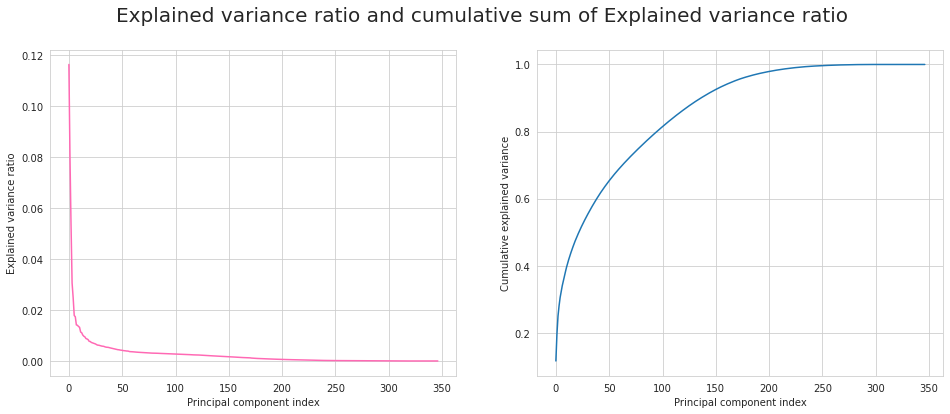

In [ ]:
# Plot 2 subplots for explained variance ratio and cumulative sum of explained variance ratio 

# your code here
fig, ax = plt.subplots(1, 2, figsize=(16,6), sharex=True) 
                 
exp_var_ratio = pca.explained_variance_ratio_
cum_sum_exp_var_ratio = np.cumsum(exp_var_ratio)

ax[0].plot(exp_var_ratio, c = 'hotpink')
ax[1].plot(cum_sum_exp_var_ratio)
ax[0].set(xlabel='Principal component index', ylabel='Explained variance ratio')
ax[1].set(xlabel='Principal component index', ylabel='Cumulative explained variance')
fig.suptitle("Explained variance ratio and cumulative sum of Explained variance ratio",  fontsize=20);

How much information (variance) can be attributed to each of the principal components is given by explained variance. Using the attribute explained_variance_ratio_, we can see that the top 100 principal component contains more than 80% of the variance, so I would consider top 100 principal components and discard the rest.

The covariance between the columns before the PCA would be low, implying low redundancy in the dataset.

####  Interpretation the PCA components.

##### **3.1** Write a function that displays the significance of each original feature along the first principle component.

In [ ]:
# your code here

''' The importance of each feature is reflected by the magnitude of the 
    corresponding values in the eigenvectors (higher magnitude — higher importance).
''' 
p_components = pca.components_
print(p_components.shape)

# Function displays the importance of the features for the PC1
def feature_impt(p_compo):
  pc1 = p_compo[0]
  idx_rev = np.argsort(pc1)
  # Index of the features starting from maximum to minimun contribution to PC1
  idx = idx_rev[::-1]
  return pc1, idx

features, index = feature_impt(p_components)

(347, 347)


In [ ]:
max_feature_contribute = features[index[0]]
print(f"Feature: { nhanes_df.columns[index[0]]} contributed maximum {round(max_feature_contribute*100,2)} % to PC1",)

Feature: LBXRBCSI contributed maximum 15.7 % to PC1


##### Which original features contribute the most to the principal components?

In [ ]:
# your code here
sum_contribution = np.sum(p_components,axis=0)
max_contribution_index = np.argmax(sum_contribution)

print(f"Feature {nhanes_df.columns[max_contribution_index]} contributed the most to all the principal components at around {sum_contribution[max_contribution_index]}")

Feature BPAARM contributed the most to all the principal components at around 3.4747194389271816


#####  Checking if the principal components are orthonormal.

In [ ]:
# your code here

result = np.dot(nhanes_tranformed, np.transpose(nhanes_tranformed))
result

array([[ 803.8097374 ,   89.286654  ,  141.38363914, ...,  -15.62144171,
         -57.66871217,  -33.1128568 ],
       [  89.286654  , 1258.27358952,  -16.30877973, ...,   66.96595028,
         -10.46201551,   27.36382031],
       [ 141.38363914,  -16.30877973,  257.90351155, ...,   44.74194875,
         -49.45312023,  -33.03159956],
       ...,
       [ -15.62144171,   66.96595028,   44.74194875, ..., 3767.28454763,
         -28.19857564,   19.61028196],
       [ -57.66871217,  -10.46201551,  -49.45312023, ...,  -28.19857564,
         119.37191627,   40.58432984],
       [ -33.1128568 ,   27.36382031,  -33.03159956, ...,   19.61028196,
          40.58432984,  134.34194126]])

#### Visualizing the PCA results.

#####  Ploting the transformed dataset on a 2-dimensional plot given by the first 2 principal components. 

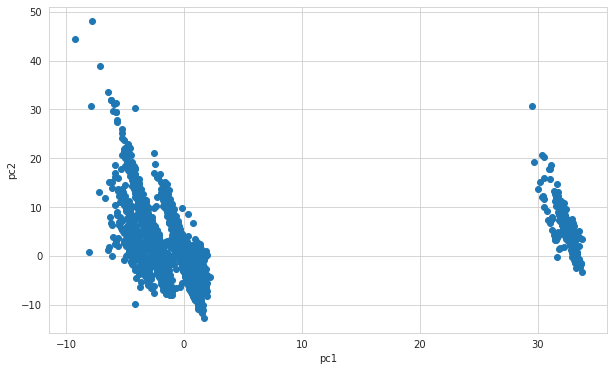

In [ ]:
# your code here
pc1 = nhanes_tranformed[:,0]
pc2 = nhanes_tranformed[:,1]

plt.figure(figsize=(10,6))
plt.scatter(pc1, pc2)
plt.xlabel('pc1')
plt.ylabel('pc2');

PC1 and PC2 are uncorrelated, and 2 clusters can be seen from the above scatter plot. The first two principal components have low or no covariance and, therefore, low redundancy.

#####  Making two histograms for each of the first 2 principal components.

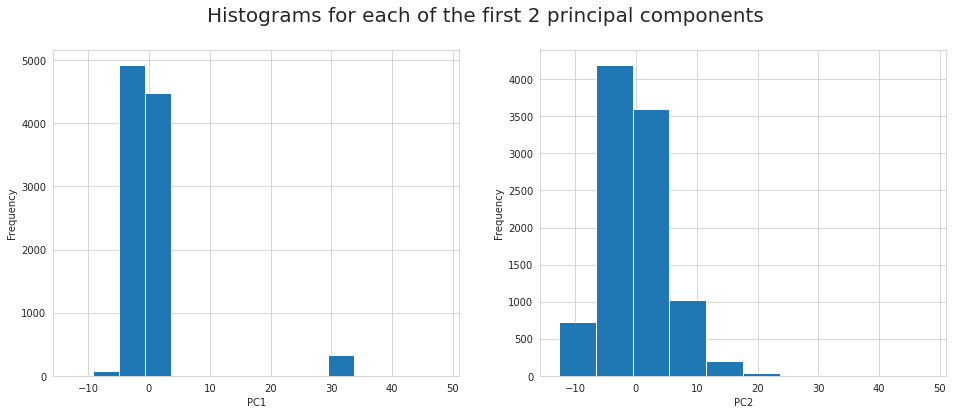

In [ ]:
# your code here
fig, ax = plt.subplots(1, 2, figsize=(16,6), sharex=True) 
              
ax[0].hist(pc1)
ax[1].hist(pc2)
ax[0].set(xlabel='PC1', ylabel='Frequency')
ax[1].set(xlabel='PC2', ylabel='Frequency')
fig.suptitle("Histograms for each of the first 2 principal components",  fontsize=20);

## Part C - Clustering 

### Performing k-means clustering.

#####  Performing k-means clustering on the first 2 principal components and find the optimal value of k.

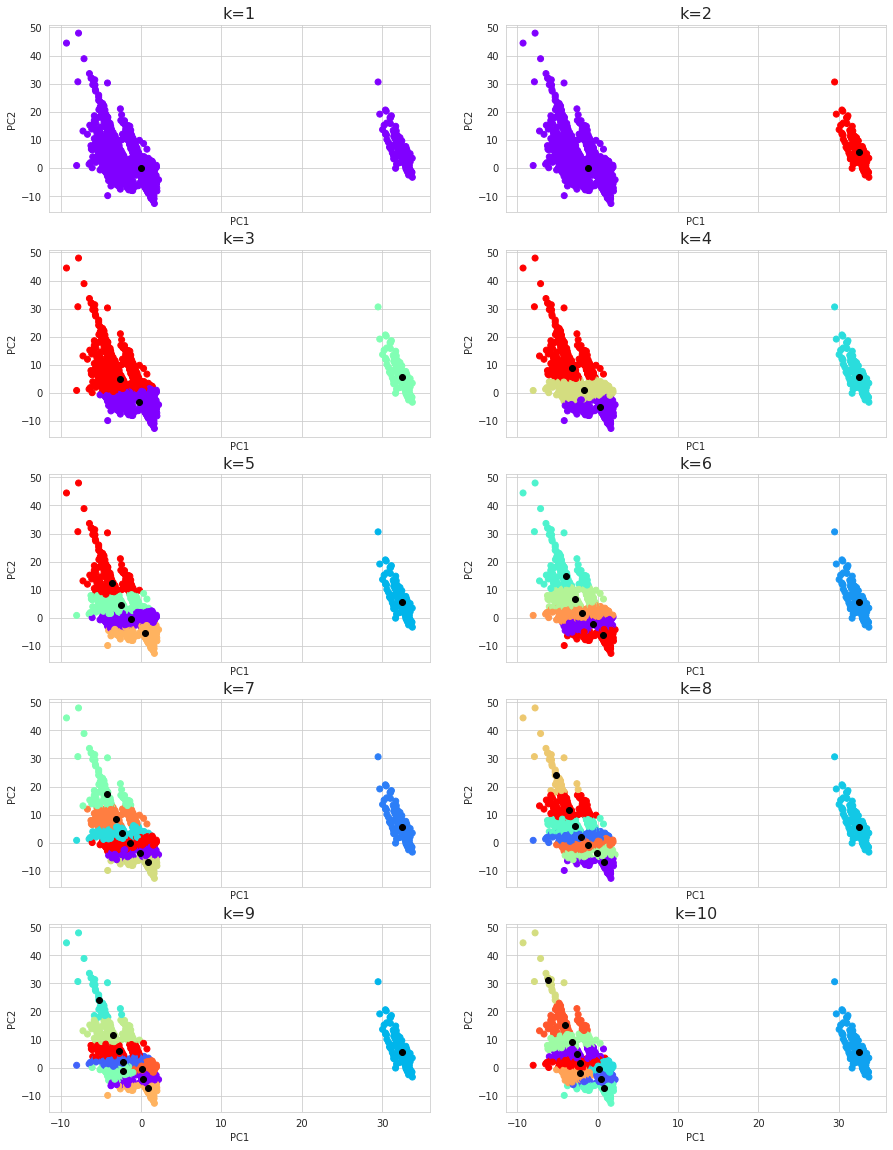

In [ ]:
# Plot 10 subplots for all 10 values of k
# your code here

X = nhanes_tranformed[:,:2]

fig, ax = plt.subplots(5, 2, figsize=(15,20), sharex=True) 
inertia = []
d=1
for i in range(5):
  for j in range(2):
    kmeans = KMeans(n_clusters=d, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)
    ax[i,j].scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
    ax[i,j].scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
    ax[i,j].set(xlabel='PC1', ylabel='PC2')
    ax[i,j].set_title(f"k={d}", fontsize=16)
    d+=1


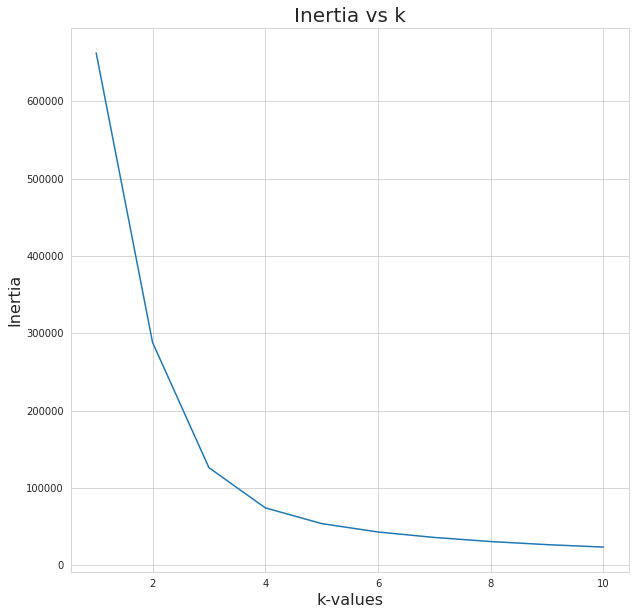

In [ ]:
#  Inertia vs k plot
# your code here

plt.figure(figsize=(10,10))
plt.plot(range(1,11), inertia)
plt.xlabel('k-values', fontsize=16)
plt.ylabel('Inertia', fontsize=16)
plt.title('Inertia vs k', fontsize=20);

Inertia measures how well K-Means clustered a dataset. A good model has low inertia and a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases. From the above inertia vs k plot k=4 looks optimal for K-means clustering. 

As we increase the number of clusters too much, it will become harder to interpret the character of each cluster, and large values make it computationally expensive. Similarly, if the value of k is too small, an important difference between the groups is not captured.

##### **1.4** Plot the clusters with the optimal k found above. Make a clear plot with effective visualization, keeping in mind the fontsize, color coding, apt plot and axes labels.

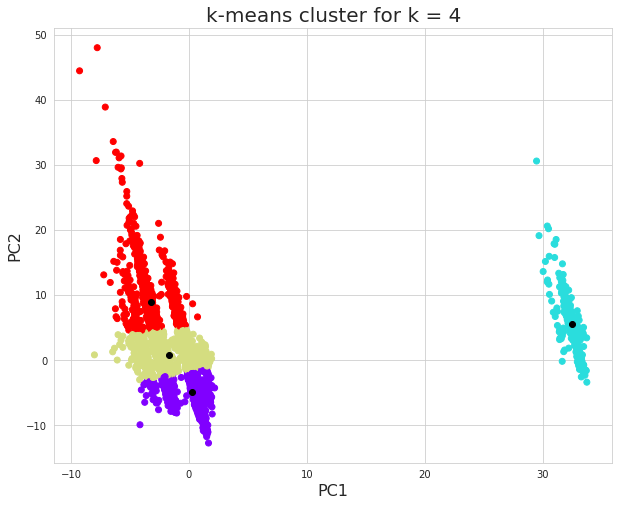

In [ ]:
# your code here

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.title('k-means cluster for k = 4', fontsize=20);

In [ ]:
kmeans.cluster_centers_[:,0]

array([ 0.26388058, 32.48045484, -1.66180236, -3.18667745])

In [ ]:
kmeans.cluster_centers_[:,1]

array([-4.90320711,  5.54248898,  0.86356103,  8.87578109])

#####  Now, performing k-means clustering on the first 3 principal components with the same value of k as found above.

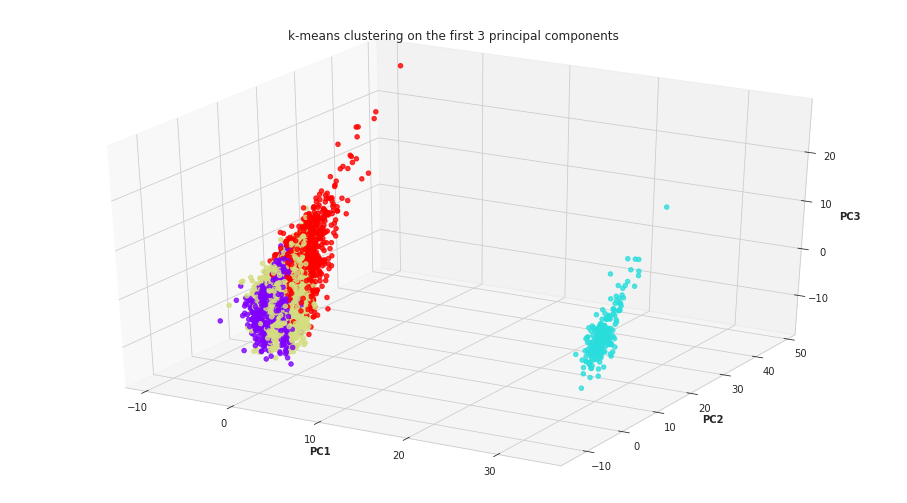

In [ ]:
# your code here

X1 = nhanes_tranformed[:,:3]
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
ax.scatter3D(X1[:,0], X1[:,1], X1[:,2], alpha = 0.8, c = kmeans.labels_, cmap='rainbow')
plt.title("k-means clustering on the first 3 principal components")
ax.set_xlabel('PC1', fontweight ='bold')
ax.set_ylabel('PC2', fontweight ='bold')
ax.set_zlabel('PC3', fontweight ='bold');                                  

In plot 1.4, k=4 is optimal, as the four clusters can capture the important difference between the groups. In plot 1.5, we add one more dimension with the same value k=4, projecting data in 3-D.

##### Creating a Seaborn `PairGrid()` plot for the transformed dataset along the first three components.

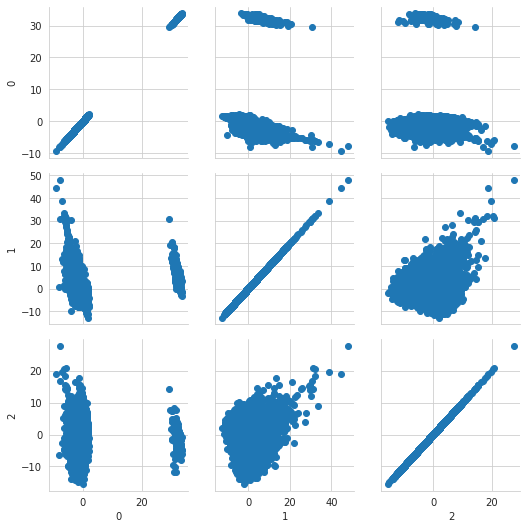

In [ ]:
# your code here
df = pd.DataFrame(X1)
g = sns.PairGrid(df)
g.map(plt.scatter);

#### Performing DBSCAN clustering.

##### **2.1** Perform DBSCAN clustering on the first 2 principal components and plot the clusters formed for different epsilon.

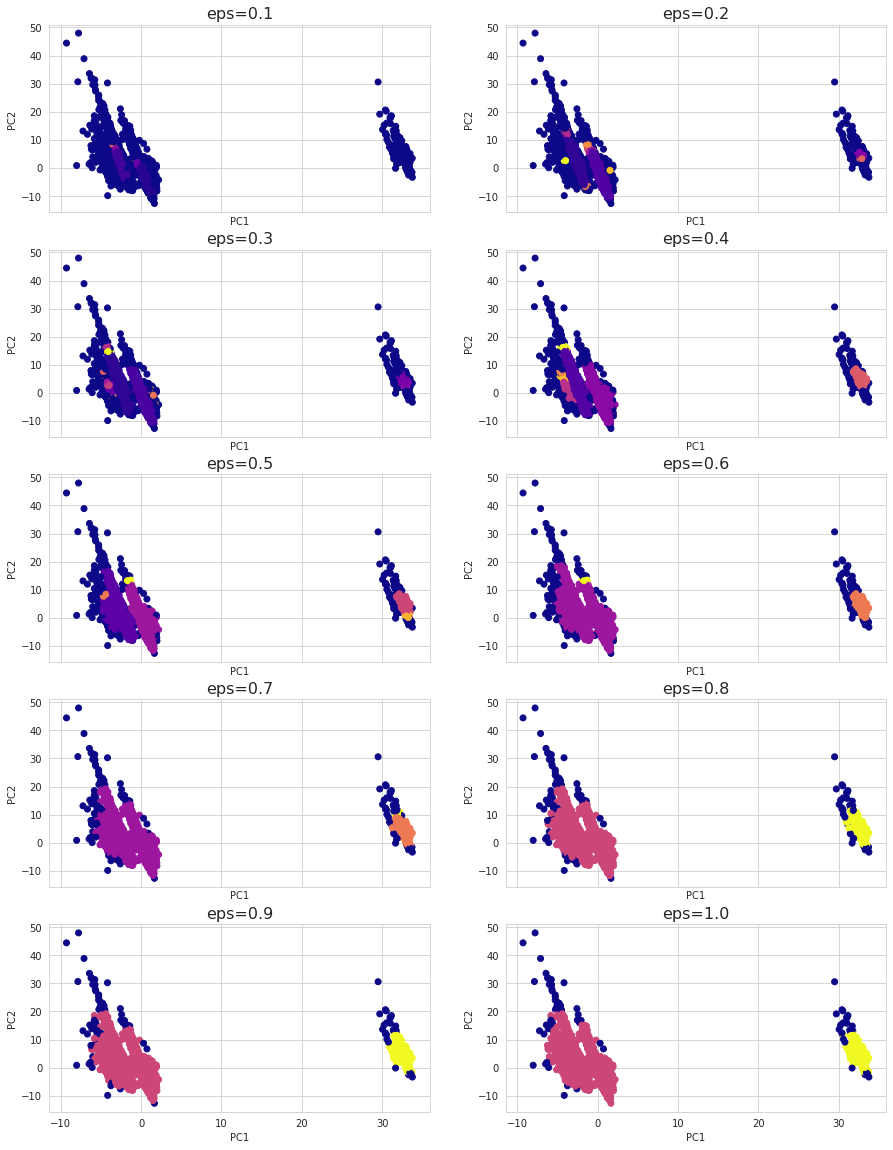

In [ ]:
# Plot 10 subplots for all 10 values of epsilon

# your code here

X = nhanes_tranformed[:,:2]
fig, ax = plt.subplots(5, 2, figsize=(15,20), sharex=True) 
d=1
for i in range(5):
  for j in range(2):
    dbscan = DBSCAN(eps=d/10, min_samples = 10).fit(X)
    labels = dbscan.labels_ 
    ax[i,j].scatter(X[:,0], X[:,1], c=labels, cmap= "plasma")
    ax[i,j].set(xlabel='PC1', ylabel='PC2')
    ax[i,j].set_title(f"eps={d/10}", fontsize=16)
    d+=1

##### Finding the optimal value of epsilon.

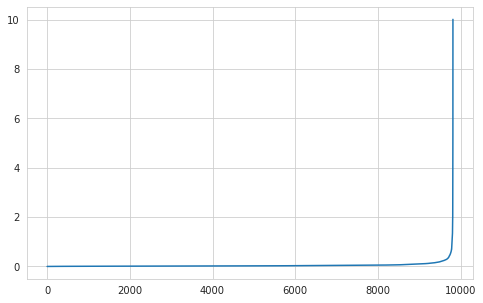

In [ ]:
# your code here

from sklearn.neighbors import NearestNeighbors 
neighb = NearestNeighbors(n_neighbors=10) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(X) 
distances,indices=nbrs.kneighbors(X)

# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (8,5) 
plt.plot(distances);

##### Ploting the clusters generated by DBSCAN with the optimal epsilon found above.

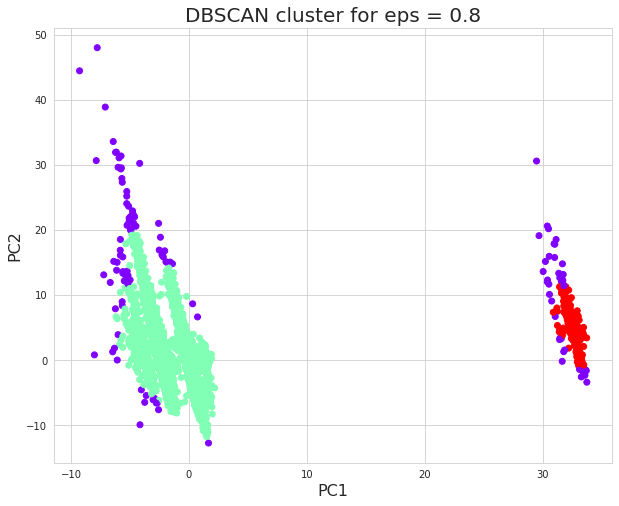

In [ ]:
# your code here

dbscan = DBSCAN(eps=0.8, min_samples = 10).fit(X)
labels = dbscan.labels_ 
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')
plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.title('DBSCAN cluster for eps = 0.8', fontsize=20);

##### Varying `min_samples` and plot the generated clusters.

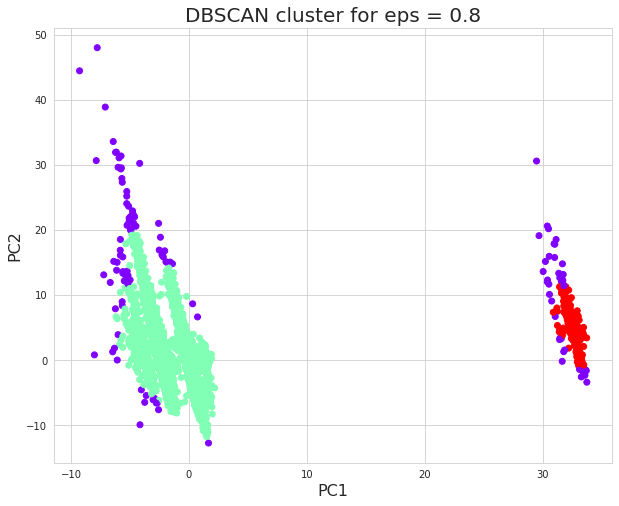

In [ ]:
# your code here
dbscan = DBSCAN(eps=0.8, min_samples = 10).fit(X)
labels = dbscan.labels_ 
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')
plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.title('DBSCAN cluster for eps = 0.8', fontsize=20);

In DBSCAN min_samples parameter affects the minimum size of each cluster formed. As we increase the min_samples size, more points will be declared noise, and clusters will be restricted to more dense areas.

By comapring the k-means clustering and DBSCAN clustering, k-means seems to be better one here, as k-means is centroid-based/partition-based clustering algorithm, where as for the DBSCAN high density is needed for clustering.
